In [38]:
import re
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import itertools
import scipy
from sklearn.linear_model import LogisticRegression
import operator
import pickle

# Reading the Facebook Graph

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(0.0, 1.0, 0.0, 1.0)

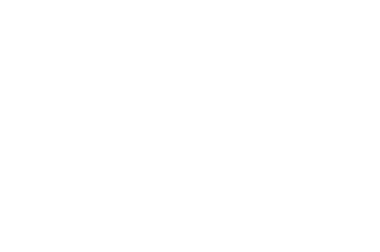

In [2]:
g = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(nx.info(g))
sp=nx.spring_layout(g)
plt.axis('off')

# Processing the embeddings from Node2Vec

In [3]:
all_values = pd.read_csv('facebook.emd')['4039 128'].values
fb_dict = {'node_id': [], 'embedding': []}

for v in all_values:
    v_split = [float(x) for x in v.split(' ')]
    fb_dict['embedding'] += [v_split[1:]]
    fb_dict['node_id'] += [int(v_split[0])]

fb_df = pd.DataFrame.from_dict(fb_dict)

In [4]:
fb_df.head()

,node_id,embedding
0,3437,"[-0.03462, 0.14721, 0.085802, -0.023518, -0.28..."
1,107,"[0.278259, 0.203138, 0.176665, 0.045982, -0.14..."
2,1684,"[0.357548, -0.144361, 0.40464, 0.335708, -0.14..."
3,0,"[-0.089028, -0.028927, -0.02356, -0.340999, 0...."
4,1912,"[-0.173345, 0.266669, 0.301875, -0.135857, -0...."


# Bridges

In [5]:
bridges = list(nx.bridges(g))
bridges

[(0, 11),
 (0, 12),
 (0, 15),
 (0, 18),
 (0, 37),
 (0, 43),
 (0, 74),
 (0, 114),
 (0, 209),
 (0, 210),
 (0, 215),
 (0, 287),
 (0, 292),
 (0, 335),
 (107, 911),
 (107, 918),
 (107, 1096),
 (107, 1119),
 (107, 1145),
 (107, 1206),
 (107, 1386),
 (107, 1466),
 (107, 1560),
 (107, 1581),
 (107, 1834),
 (348, 358),
 (348, 447),
 (348, 550),
 (414, 585),
 (414, 602),
 (414, 607),
 (414, 608),
 (414, 613),
 (414, 624),
 (414, 638),
 (414, 668),
 (414, 674),
 (1684, 2842),
 (1684, 3031),
 (1684, 3071),
 (1684, 3183),
 (1684, 3230),
 (1912, 2079),
 (1912, 2195),
 (1912, 2269),
 (1912, 2457),
 (1912, 2470),
 (1912, 2569),
 (1912, 2596),
 (3437, 3451),
 (3437, 3453),
 (3437, 3570),
 (3437, 3650),
 (3437, 3709),
 (3437, 3729),
 (3437, 3748),
 (3437, 3798),
 (3437, 3820),
 (3437, 3853),
 (3437, 3856),
 (3437, 3935),
 (3437, 3974),
 (3980, 3984),
 (3980, 4008),
 (3980, 4010),
 (3980, 4015),
 (3980, 4022),
 (3980, 4024),
 (3980, 4035),
 (686, 692),
 (686, 801),
 (698, 875),
 (698, 883),
 (698, 891),


In [6]:
bridges_len = len(bridges)
bridge_heavy_nodes = []
for i in range(bridges_len):
    node = bridges[i][0]
    if node not in bridge_heavy_nodes:
        bridge_heavy_nodes.append(node)
bridge_heavy_nodes

[0, 107, 348, 414, 1684, 1912, 3437, 3980, 686, 698]

In [7]:
def k_embeddings(ks):
    #takes list of k and returns list of embeddings those of k
    embeddings = []
    for k in ks:
        embeddings.append(fb_df['embedding'][k])
    return embeddings

def random_k_embeddings(k, excl):
    #returns list of random k number of embeddings that is not part of excl list
    random_k = []
    while len(random_k) < k:
        i = random.randint(0, 4038)
        if i not in random_k and i not in excl:
            random_k.append(i)
    return k_embeddings(random_k)

In [8]:
list(itertools.chain.from_iterable(random_k_embeddings(2, bridge_heavy_nodes)))

[0.171746,
 -0.139864,
 0.596131,
 0.474915,
 0.049932,
 -0.238781,
 -0.546277,
 0.077543,
 0.390576,
 -0.127068,
 -0.49629,
 0.240199,
 -0.204146,
 0.045344,
 0.436265,
 -0.341898,
 0.39111,
 -0.446219,
 -0.21888,
 -0.386589,
 -0.339526,
 0.461104,
 -0.315448,
 0.541448,
 0.173293,
 -0.10358,
 -0.53352,
 -0.085892,
 0.145094,
 0.167128,
 0.429391,
 -0.079594,
 0.328062,
 0.022597,
 0.035496,
 0.597951,
 -0.076589,
 0.113149,
 0.221673,
 0.272854,
 0.6018,
 0.123386,
 0.629259,
 0.106332,
 0.182383,
 -0.474257,
 0.206985,
 0.211505,
 -0.345621,
 -0.635828,
 0.050798,
 0.676501,
 0.123978,
 0.243392,
 0.077367,
 0.113823,
 0.457771,
 -0.045509,
 -0.270253,
 -0.195462,
 -0.231165,
 -0.355922,
 -0.057598,
 0.008134,
 0.259876,
 -0.332004,
 0.114269,
 -0.182716,
 0.417781,
 0.041617,
 0.118994,
 -0.432473,
 0.05719,
 -0.597731,
 -0.093666,
 -0.390934,
 0.178239,
 -0.156395,
 0.266274,
 0.480025,
 0.131538,
 -0.041761,
 0.133282,
 -0.047808,
 0.109267,
 -0.22552,
 0.126061,
 0.238496,
 0.03

In [9]:
pvalues = []
for i in range(10000):
    pvalues.append(scipy.stats.ttest_ind(list(itertools.chain.from_iterable(k_embeddings(bridge_heavy_nodes))), list(itertools.chain.from_iterable(random_k_embeddings(len(bridge_heavy_nodes), bridge_heavy_nodes)))).pvalue)
np.mean(pvalues)

0.6474972697440927

# Closeness Centrality

In [44]:
closeness = pickle.load(open('closeness_data.pkl', 'rb'))

In [45]:
def top_k_closeness(k):
    #take 0<k<1 (percentage) returns top k% closeness list of nodes
    num = int(k * 4038)
    top_k = []
    for i in range(num):
        top_k.append(sorted_closeness[i][0])
    return top_k

top_k_closeness(0.05)

[107,
 58,
 428,
 563,
 1684,
 171,
 348,
 483,
 414,
 376,
 475,
 566,
 1666,
 1534,
 484,
 353,
 1171,
 651,
 420,
 1085,
 1687,
 1577,
 1718,
 1165,
 1136,
 1465,
 0,
 1912,
 580,
 1505,
 1405,
 1656,
 990,
 1642,
 1758,
 1419,
 1450,
 1726,
 517,
 366,
 606,
 526,
 641,
 1663,
 1352,
 1173,
 1420,
 601,
 1835,
 1361,
 1376,
 1126,
 1621,
 1536,
 1358,
 1013,
 1029,
 1574,
 925,
 1320,
 1522,
 1545,
 1237,
 1688,
 1179,
 1692,
 1509,
 1374,
 916,
 1074,
 1313,
 930,
 1334,
 1289,
 1098,
 1300,
 1549,
 1593,
 1070,
 1317,
 1425,
 1555,
 1617,
 1512,
 1193,
 1360,
 1825,
 1806,
 1511,
 1778,
 1740,
 1553,
 1590,
 921,
 1777,
 1274,
 1217,
 1114,
 1567,
 1369,
 1307,
 1408,
 1866,
 1446,
 1702,
 1312,
 1705,
 1494,
 1847,
 1178,
 1338,
 1803,
 1421,
 1588,
 1210,
 1410,
 1187,
 1328,
 1540,
 1537,
 1719,
 1077,
 1182,
 1618,
 1088,
 1109,
 1483,
 1518,
 1226,
 962,
 1513,
 1523,
 915,
 1028,
 1782,
 1485,
 1327,
 1846,
 1808,
 1745,
 1863,
 1909,
 1911,
 1626,
 1440,
 1883,
 1458,
 185

In [46]:
k_embeddings(top_k_closeness(0.05))

[[-0.004873,
  -0.018595,
  -0.027876,
  -0.275633,
  -0.043666,
  -0.32193,
  -0.209048,
  -0.637584,
  0.358841,
  0.019659,
  0.29968,
  -0.330096,
  -0.098617,
  -0.236731,
  0.173171,
  -0.619209,
  0.456557,
  -0.03108,
  -0.009178,
  -0.601505,
  0.124444,
  0.075042,
  -0.057408,
  0.600542,
  -0.179205,
  -0.505922,
  -0.231489,
  -0.773567,
  -0.368417,
  -0.253896,
  0.624604,
  0.271432,
  -0.070803,
  -0.572428,
  0.154715,
  0.212917,
  -0.401101,
  0.04156,
  0.531911,
  -0.001462,
  -0.243962,
  0.219369,
  0.021711,
  0.111038,
  -0.231819,
  0.023018,
  -0.094803,
  -0.229828,
  -0.201232,
  0.002143,
  0.09441,
  0.259148,
  0.029853,
  0.282816,
  0.35443,
  -0.320766,
  -0.135092,
  -0.133996,
  -0.715016,
  0.126207,
  0.127871,
  -0.234953,
  0.085302,
  0.138911,
  0.282835,
  -0.03133,
  0.059873,
  -0.664255,
  0.575129,
  -0.199332,
  0.179424,
  0.341718,
  0.858247,
  -0.339067,
  0.203547,
  -0.816897,
  0.358983,
  -0.240889,
  0.186433,
  -0.105184,
  0.

In [47]:
scipy.stats.ttest_ind(list(itertools.chain.from_iterable(k_embeddings(top_k_closeness(0.05)))), list(itertools.chain.from_iterable(random_k_embeddings(len(top_k_closeness(0.05)), top_k_closeness(0.05)))))

Ttest_indResult(statistic=-0.00931126958769035, pvalue=0.9925708252048114)

# Data in Dictionary

In [48]:
bridge_dict = {'bridge':k_embeddings(bridge_heavy_nodes), 'not_bridge': random_k_embeddings(len(bridge_heavy_nodes), bridge_heavy_nodes)}
bridge_dict

{'bridge': [[-0.03462,
   0.14721,
   0.085802,
   -0.023518,
   -0.288208,
   0.551234,
   -0.025985,
   -0.094483,
   0.53282,
   -0.044698,
   0.126412,
   0.201336,
   -0.417662,
   -0.06355,
   0.360891,
   -0.406914,
   0.438858,
   -0.563924,
   0.552539,
   -0.57502,
   0.330268,
   0.181751,
   0.126451,
   0.132789,
   0.193585,
   -0.00325,
   -0.183159,
   -0.064503,
   0.012772,
   -0.068639,
   0.145394,
   0.002641,
   0.013921,
   0.379262,
   -0.383119,
   0.258044,
   -0.666354,
   -0.398901,
   0.228397,
   -0.031865,
   0.192155,
   -0.36546,
   0.301898,
   -0.060029,
   0.741612,
   -0.080172,
   -0.017363,
   -0.508339,
   0.010808,
   -0.586621,
   0.257959,
   0.11017,
   -0.503681,
   0.499689,
   -0.152598,
   0.17149,
   -0.163792,
   -0.383486,
   -0.265442,
   -0.599142,
   -0.379442,
   -0.194956,
   0.333704,
   0.218649,
   -0.220414,
   -0.437673,
   0.298927,
   -0.110175,
   -0.035104,
   -0.357501,
   -0.047548,
   0.287961,
   0.835065,
   -0.31267

In [49]:
#top 5% closeness value nodes
close_nodes = top_k_closeness(0.05)
closeness_dict = {'close': k_embeddings(close_nodes), 'not_close': random_k_embeddings(len(close_nodes), close_nodes)}
closeness_dict

{'close': [[-0.004873,
   -0.018595,
   -0.027876,
   -0.275633,
   -0.043666,
   -0.32193,
   -0.209048,
   -0.637584,
   0.358841,
   0.019659,
   0.29968,
   -0.330096,
   -0.098617,
   -0.236731,
   0.173171,
   -0.619209,
   0.456557,
   -0.03108,
   -0.009178,
   -0.601505,
   0.124444,
   0.075042,
   -0.057408,
   0.600542,
   -0.179205,
   -0.505922,
   -0.231489,
   -0.773567,
   -0.368417,
   -0.253896,
   0.624604,
   0.271432,
   -0.070803,
   -0.572428,
   0.154715,
   0.212917,
   -0.401101,
   0.04156,
   0.531911,
   -0.001462,
   -0.243962,
   0.219369,
   0.021711,
   0.111038,
   -0.231819,
   0.023018,
   -0.094803,
   -0.229828,
   -0.201232,
   0.002143,
   0.09441,
   0.259148,
   0.029853,
   0.282816,
   0.35443,
   -0.320766,
   -0.135092,
   -0.133996,
   -0.715016,
   0.126207,
   0.127871,
   -0.234953,
   0.085302,
   0.138911,
   0.282835,
   -0.03133,
   0.059873,
   -0.664255,
   0.575129,
   -0.199332,
   0.179424,
   0.341718,
   0.858247,
   -0.3390